# **A2C Algorithm (Stable Baseline3)**

Use Stable Baselines3 to train an Advantage Actor-Critic (A2C) agent on the LunarLander-v2 environment.

1. **Visualize A2C Algorithm**: Visualization of the A2C algorithm's architecture using Graphviz.
2. **Imports and Helper Function**s: Required libraries and helper functions for video handling, animation, and reward plotting.
3. **Environment Setup**: Initialize the environment.
4. **A2C Model Configuration**: Configure the A2C model.
5. **Training the Model**: Train the A2C model and save it.
6. **Evaluation and Video Recording**: Record a video of the agent’s performance and display the video.
7. **Animation Display**: Create and display an animation of the agent’s performance.
8. **Reward Plotting**: Plot rewards collected per episode.
9. **Download Video**: Provide an option to download the recorded video.

# Visualize A2C Algorithm

A2C Algorithm block diagram created successfully!


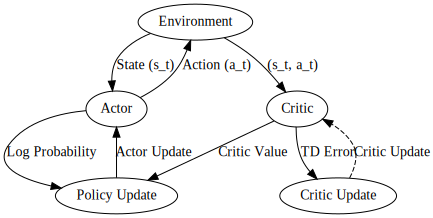

In [1]:
# Visualize A2C Algorithm
import graphviz
graphviz.__version__, graphviz.version()
from graphviz import Digraph

# Define the graph
dot = Digraph(name='A2C_Algorithm', format='png')

# Add nodes
dot.node('environment', label='Environment')
dot.node('actor', label='Actor')
dot.node('critic', label='Critic')
dot.node('policy_update', label='Policy Update')
dot.node('critic_update', label='Critic Update')

# Add edges with labels
dot.edge('environment', 'actor', label='State (s_t)')
dot.edge('actor', 'environment', label='Action (a_t)')
dot.edge('environment', 'critic', label='(s_t, a_t)')
dot.edge('critic', 'policy_update', label='Critic Value')
dot.edge('actor', 'policy_update', label='Log Probability')
dot.edge('policy_update', 'actor', label='Actor Update')
dot.edge('critic', 'critic_update', label='TD Error')
dot.edge('critic_update', 'critic', label='Critic Update', style='dashed')

# Render the graph
dot.render('a2c_diagram.png', view=True)

print("A2C Algorithm block diagram created successfully!")

dot

The **A2C (Advantage Actor-Critic)** algorithm diagram visually represents the key components and data flow involved in the A2C reinforcement learning algorithm. Here’s a summary of the diagram's components and their interactions:

**Environment**: The environment interacts with the agent by providing states and rewards. It receives actions from the Actor and sends state-action pairs to the Critic.

**Actor**: The Actor network decides which action to take based on the current state. It receives the state from the environment and sends the chosen action back. The Actor also receives updates from the Policy Update step to improve its policy.

**Critic**: The Critic network estimates the value of states or state-action pairs. It receives state-action pairs from the environment and provides value estimates to the Policy Update step. The Critic is updated based on the TD (temporal difference) error.

**Policy Update**: This step updates the Actor based on the computed advantage function, which measures how good the taken actions are relative to the estimated values. The Policy Update step adjusts the Actor’s policy to maximize rewards.

**Critic Update**: This step refines the Critic’s value function based on the TD error, which is the difference between the predicted value and the actual reward plus the discounted value of the next state.

**Data Flow**:

The Environment sends the state to the Actor and receives actions from it.

The Actor provides actions to the Environment and logs probabilities of those actions.

The Environment provides state-action pairs to the Critic for value estimation.

The Critic calculates the TD error and provides value estimates to the Policy Update step.

The Policy Update step uses the advantage function and the Actor’s log probabilities to update the Actor.

The Critic is updated based on the TD error received from the Critic Update step.

The diagram encapsulates the iterative process of updating both the Actor and Critic networks to optimize the policy and value function for improved decision-making in reinforcement learning.

# Imports and Helper Functions

In [30]:
# Install Dependencies
!pip install stable-baselines3[extra]
!pip install gymnasium
!pip install matplotlib

# Import Libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
from gymnasium.wrappers import StepAPICompatibility
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import BaseCallback
from matplotlib import animation
from IPython.display import display, HTML
import cv2
from base64 import b64encode
import pandas as pd

# Helper Function to Display Video
def display_video(video_path):
    with open(video_path, 'rb') as f:
        video_data = f.read()
    video_base64 = b64encode(video_data).decode()
    video_html = f"""
    <video width="600" controls>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
    </video>
    """
    display(HTML(video_html))

# Define Custom Callbacks

In [31]:
# Custom Callback to Save Video Frames
class VideoCallback(BaseCallback):
    def __init__(self, save_path, env, freq=1000, verbose=1):
        super(VideoCallback, self).__init__(verbose)
        self.save_path = save_path
        self.env = env
        self.freq = freq
        self.frames = []
        self.frame_counter = 0

    def _on_step(self) -> bool:
        self.frame_counter += 1
        if self.frame_counter % self.freq == 0:
            frame = self.env.render(mode='rgb_array')
            self.frames.append(frame)
        return True

    def _on_training_end(self):
        if self.frames:
            height, width, _ = self.frames[0].shape
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            video = cv2.VideoWriter(self.save_path, fourcc, 30.0, (width, height))
            for frame in self.frames:
                video.write(frame)
            video.release()

# Custom Callback to Log Rewards
class RewardLoggerCallback(BaseCallback):
    def __init__(self, log_path, verbose=1):
        super(RewardLoggerCallback, self).__init__(verbose)
        self.log_path = log_path
        self.rewards = []

    def _on_step(self) -> bool:
        if self.n_calls % 1000 == 0:  # Log every 1000 steps
            self.rewards.append(self.locals['infos'][0]['r'])
        return True

    def _on_training_end(self):
        pd.DataFrame(self.rewards, columns=["Reward"]).to_csv(self.log_path, index=False)

# Set Up Environment and Train the Model

In [33]:
# Set up the LunarLander-v2 environment
env = gym.make("LunarLander-v2", render_mode='rgb_array')
env = StepAPICompatibility(env)  # Ensure compatibility with the newer API
env = DummyVecEnv([lambda: env])

# Paths to save the video and reward logs
video_path = "/content/training_video.mp4"
reward_log_path = '/content/rewards_log.csv'

# Initialize A2C model
model = A2C("MlpPolicy", env, verbose=1, tensorboard_log="./a2c_lunarlander_tensorboard/")

# Define the callbacks
video_callback = VideoCallback(save_path=video_path, env=env, freq=1000)
reward_logger_callback = RewardLoggerCallback(log_path=reward_log_path)

# Train the model
model.learn(total_timesteps=20000, callback=[video_callback, reward_logger_callback])


Using cpu device


AssertionError: The algorithm only supports (<class 'gymnasium.spaces.box.Box'>, <class 'gymnasium.spaces.discrete.Discrete'>, <class 'gymnasium.spaces.multi_discrete.MultiDiscrete'>, <class 'gymnasium.spaces.multi_binary.MultiBinary'>) as action spaces but Box(-1.0, 1.0, (1,), float32) was provided

# Display the Saved Video and Provide Download Link

In [23]:
# Display the saved video
display_video(video_path)

# Provide download link for the video
from google.colab import files
files.download(video_path)

# Plot Rewards

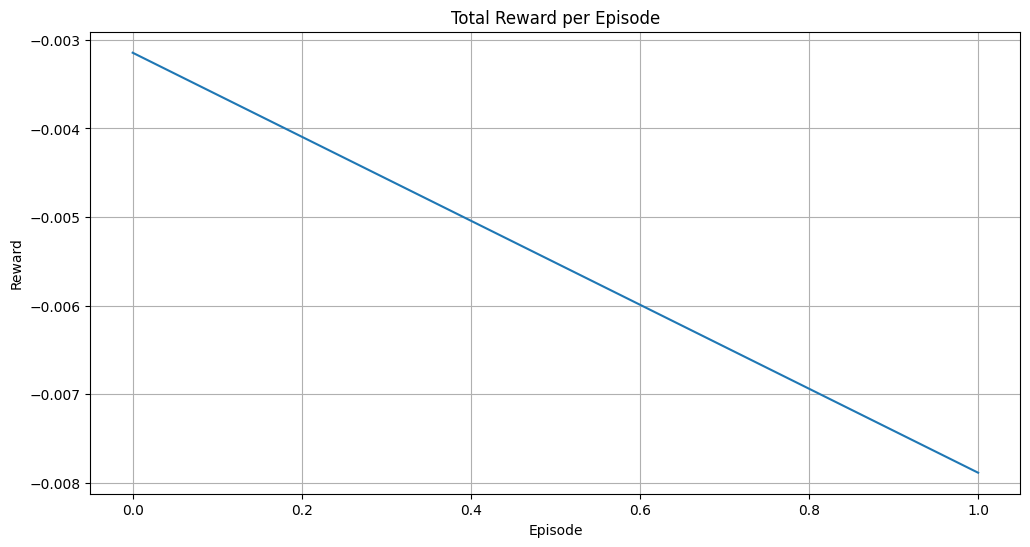

In [24]:
# Load the reward log data
reward_data = pd.read_csv(reward_log_path)

# Plot the rewards
plt.figure(figsize=(12, 6))
plt.plot(reward_data['Reward'])
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# Create and Display Animation of the Environment

In [ ]:
# Function to generate and display animation in Colab
def create_animation(frames):
    fig = plt.figure()
    plt.axis('off')

    ims = []
    for frame in frames:
        im = plt.imshow(frame, animated=True)
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
    return ani

# Evaluate the model and capture frames for animation
env = model.get_env()
obs = env.reset()

frames = []
for _ in range(500):
    action, _ = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    frames.append(env.render(mode='rgb_array'))
    if dones:
        break

# Create animation
ani = create_animation(frames)
HTML(ani.to_jshtml())